In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
f = lambda x, v : np.exp(-0.5*x**2 -0.5*v**2) 

In [3]:
nx = 200; nv = 200 
x = np.linspace(-np.pi, np.pi, nx)
v = np.linspace(-np.pi, np.pi, nv)
dx = 2*np.pi / nx; dv = 2*np.pi / nv  
xx, vv = np.meshgrid(x,v) 

In [4]:
f_zero = f(xx, vv) 

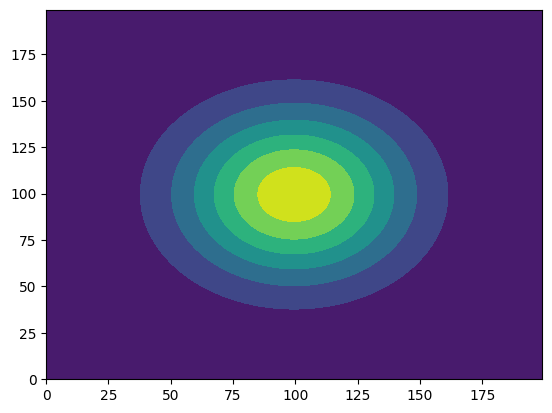

In [5]:
plt.contourf(f_zero) 

In [6]:
def compute_rho(x, dv, f):
    nx = len(x) 
    rho =  1 - dv * np.array(
        [np.sum(f[:,j]) 
        for j in range(nx)
        ]
    )
    return rho 

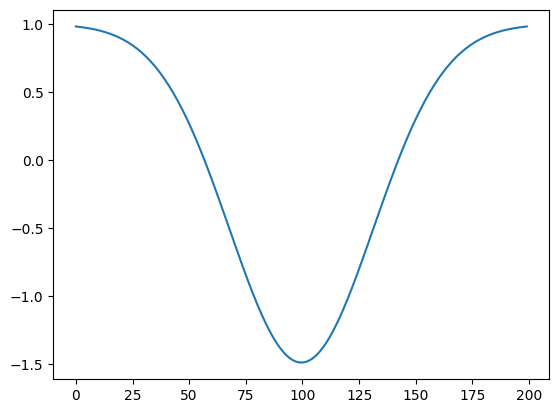

In [7]:
rho = compute_rho(x, dv, f_zero) 
plt.plot(rho) 

In [8]:
def build_diff_matrix(x, dx):
    m = np.zeros((nx,nx)) 

    for i in range(1, nx-1):
        m[i,i+1] = 1 
        m[i,i-1] = -1 
    
    m[0,1] = 1; m[0,-1] = -1 
    m[-1,0] = 1; m[-1, -2] = -1 

    return (1/(2*dx)) * m 

In [9]:
def build_diff_matrix_uncentered(x, dx):
    m = np.zeros((nx,nx)) 

    for i in range(nx-1):
        m[i,i+1] = 1 
        m[i,i] = -1
    
    m[-1,0] = 1; m[-1,-1] = -1 

    return (1/dx) * m 
        

In [10]:
m = build_diff_matrix(x, dx) 

In [11]:
m

array([[  0.        ,  15.91549431,   0.        , ...,   0.        ,
          0.        , -15.91549431],
       [-15.91549431,   0.        ,  15.91549431, ...,   0.        ,
          0.        ,   0.        ],
       [  0.        , -15.91549431,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         15.91549431,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., -15.91549431,
          0.        ,  15.91549431],
       [ 15.91549431,   0.        ,   0.        , ...,   0.        ,
        -15.91549431,   0.        ]])

In [12]:
m_un = build_diff_matrix_uncentered(x, dx) 

In [13]:
def solve_poisson_centered(x, dx, dv, f):
    rho = compute_rho(x, dv, f)
    m = build_diff_matrix(x, dx) 
    E = np.linalg.pinv(m) @ rho 
    return E 

In [14]:
def solve_poisson_uncentered(x, dx, dv, f):
    rho = compute_rho(x, dv, f)
    m = build_diff_matrix_uncentered(x, dx) 
    E = np.linalg.pinv(m) @ rho 
    return E 


In [15]:
E = solve_poisson_centered(x, dx, dv, f_zero) 
E_un = solve_poisson_uncentered(x, dx, dv, f_zero) 

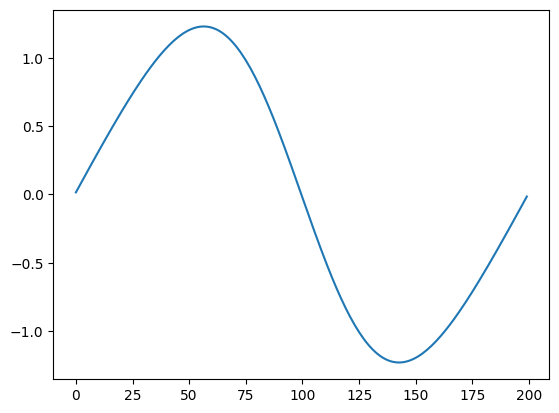

In [16]:
plt.plot(E)

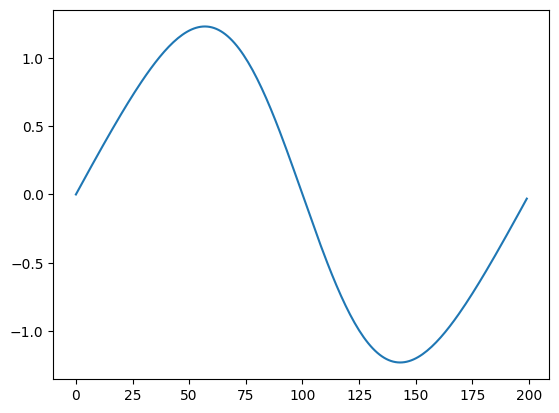

In [17]:
plt.plot(E_un)

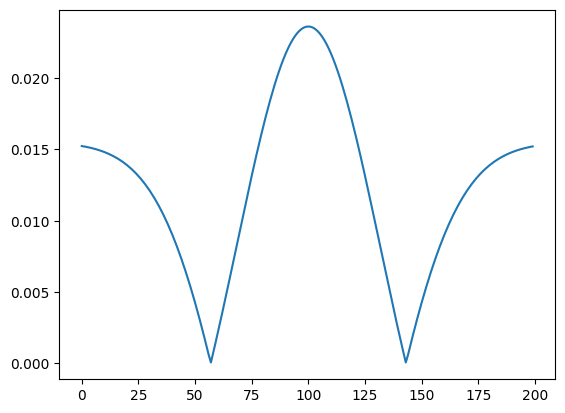

In [18]:
plt.plot(np.abs(E-E_un))